In [1]:
# Import libraries
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
from sklearn.linear_model import LinearRegression as lrs 

In [2]:
# Import duckdb to use SQL query
import duckdb as dkb

In [3]:
# Load the data csv file
data = pd.read_csv(r"survey_results_public.csv")
data.head(5)

C:\Users\huysi\AppData\Local\Temp\ipykernel_22544\691958225.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r"survey_results_public.csv")


,ResponseId,MainBranch,Age,EdLevel,Employment,EmploymentAddl,WorkExp,LearnCodeChoose,LearnCode,LearnCodeAI,...,AIAgentOrchestration,AIAgentOrchWrite,AIAgentObserveSecure,AIAgentObsWrite,AIAgentExternal,AIAgentExtWrite,AIHuman,AIOpen,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,25-34 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed,"Caring for dependents (children, elderly, etc.)",8.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",...,Vertex AI,NaN,NaN,NaN,ChatGPT,NaN,When I don’t trust AI’s answers,"Troubleshooting, profiling, debugging",61256.0,10.0
1,2,I am a developer by profession,25-34 years old,"Associate degree (A.A., A.S., etc.)",Employed,NaN,2.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,NaN,NaN,When I don’t trust AI’s answers;When I want to...,All skills. AI is a flop.,104413.0,9.0
2,3,I am a developer by profession,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Independent contractor, freelancer, or self-em...",None of the above,10.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,ChatGPT;Claude Code;GitHub Copilot;Google Gemini,NaN,When I don’t trust AI’s answers;When I want to...,"Understand how things actually work, problem s...",53061.0,8.0
3,4,I am a developer by profession,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed,None of the above,4.0,"Yes, I am not new to coding but am learning ne...","Other online resources (e.g. standard search, ...","Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,ChatGPT;Claude Code,NaN,When I don’t trust AI’s answers;When I want to...,NaN,36197.0,6.0
4,5,I am a developer by profession,35-44 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...","Caring for dependents (children, elderly, etc.)",21.0,"No, I am not new to coding and did not learn n...",NaN,"Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,NaN,NaN,When I don’t trust AI’s answers,"critical thinking, the skill to define the tas...",60000.0,7.0


In [4]:
# Query Number of Responses by Age with Duckdb
query1 = """
    select REPLACE(REPLACE(Age, ' years old', ''), '65 years or older', ' >=65') AS Age, count(ResponseID) as 'Number of Responses'
    from data
    where Age != 'Prefer not to say'
    group by Age
    order by Age desc
        """

con = dkb.connect()
result1 = con.sql(query1).df()
result1

,Age,Number of Responses
0,55-64,2626
1,45-54,6265
2,35-44,13232
3,25-34,16485
4,18-24,9195
5,>=65,942


In [5]:
# Add labels to attributes
labels = result1['Age']
size = result1['Number of Responses']

In [6]:
text_properties = {
    'fontsize': 16,      # Increase font size
    'fontweight': 'semi-bold' # Set font weight
}

# Customize wedge (slice) properties (for borders)
wedge_properties = {
    'linewidth': 0.4,        # Set border width
    'edgecolor': 'black' # Set border color
}

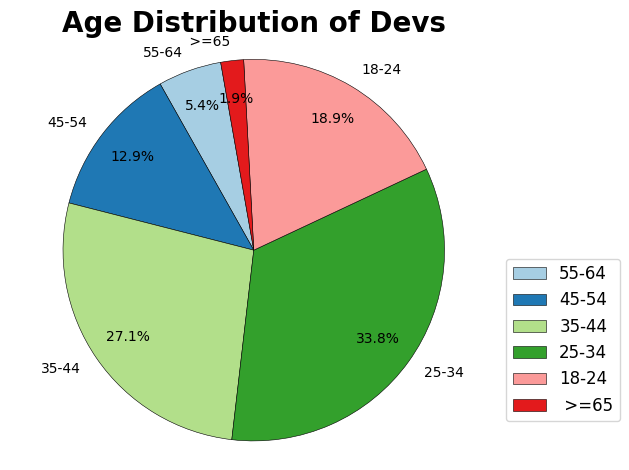

In [7]:
plt.Figure(figsize=(10,8))
plt.pie(size, labels=labels, 
        autopct='%1.1f%%',
        pctdistance=0.8, 
        startangle=100, 
        colors=plt.cm.Paired.colors,
        wedgeprops=wedge_properties)
plt.axis('equal')
plt.title('Age Distribution of Devs', fontsize = 20, fontweight = 'bold')
plt.legend(loc ='best',
           bbox_to_anchor=(1, 0.5), 
           fontsize='large')
plt.tight_layout()
plt.show()

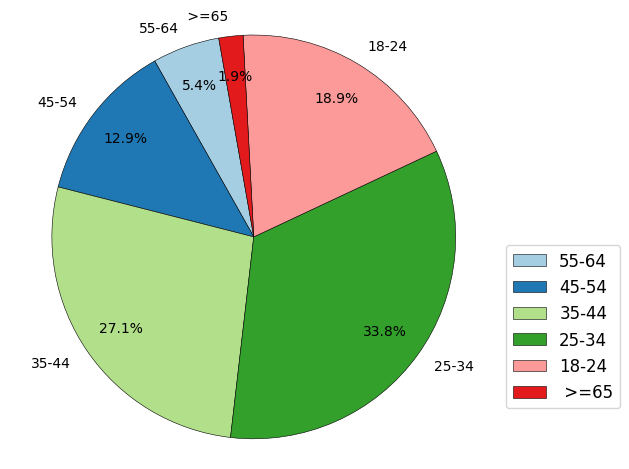

In [8]:
plt.Figure(figsize=(10,8))
plt.pie(size, labels=labels, 
        autopct='%1.1f%%',
        pctdistance=0.8, 
        startangle=100, 
        colors=plt.cm.Paired.colors,
        wedgeprops=wedge_properties)
plt.axis('equal')
plt.legend(loc ='best',
           bbox_to_anchor=(1, 0.5), 
           fontsize='large')
plt.tight_layout()
plt.show()

In [9]:
query2 = """
    select REPLACE(REPLACE(Age, ' years old', ''), '65 years or older', ' Over 65') AS Age, round(avg(WorkExp),2) as 'Avg. Years of Exp'
    from data
    where Age != 'Prefer not to say'
    group by age
    order by avg(workexp)
"""
result2 = con.sql(query2).df()
display(result2)

,Age,Avg. Years of Exp
0,18-24,2.94
1,25-34,6.92
2,35-44,14.70
3,45-54,23.85
4,55-64,32.80
5,Over 65,41.37


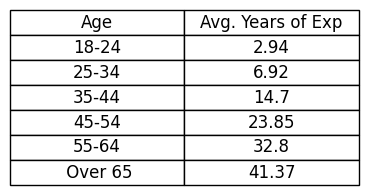

In [10]:
fig, ax = plt.subplots(figsize=(3,1))
ax.axis("off")

table = ax.table(cellText =result2.values, colLabels=result2.columns, cellLoc="center", loc="center")
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.5, 1.5)  # Adjust cell size

plt.show()

In [11]:
demoq = """
    select edlevel, count(edlevel)
    from data
    group by edlevel
"""
re_demo = con.sql(demoq).df()
re_demo

,EdLevel,count(edlevel)
0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",20247
1,"Associate degree (A.A., A.S., etc.)",1560
2,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",2620
3,Some college/university study without earning ...,6175
4,Primary/elementary school,582
5,"Secondary school (e.g. American high school, G...",3627
6,None,0
7,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",12575
8,Other (please specify):,701


In [12]:
con.execute("""DROP TABLE IF EXISTS data_clean;""")
con.execute("""
    CREATE TABLE data_clean AS
SELECT
    CASE
        WHEN LOWER(TRIM(edlevel)) LIKE '%associate%' THEN 'Associate''s degree'
        WHEN LOWER(TRIM(edlevel)) LIKE '%professional%' THEN 'Professional''s degree'
        WHEN LOWER(TRIM(edlevel)) LIKE '%master%' THEN 'Master''s degree'
        WHEN LOWER(TRIM(edlevel)) LIKE '%bachelor%' THEN 'Bachelor''s degree'
        WHEN LOWER(TRIM(edlevel)) LIKE '%secondary%' THEN 'Secondary school'
        WHEN LOWER(TRIM(edlevel)) LIKE '%other%' THEN 'Other'
        WHEN LOWER(TRIM(edlevel)) LIKE '%some%' THEN 'Some college without earning a degree'
        ELSE TRIM(edlevel)
    END AS edlevel,
    responseid
FROM data
""")
result3 = con.sql("""
    SELECT edlevel as 'Education', 
                  COUNT(responseid) * 100.0 / (SELECT COUNT(responseid) FROM data_clean WHERE edlevel != 'NA') AS 'Percentage of Responses'  
    FROM data_clean
    WHERE edlevel != 'NA'
    GROUP BY edlevel
    ORDER BY edlevel ASC
""").df()

res_sorted = result3.sort_values(by='Percentage of Responses', ascending = True)
res_sorted

,Education,Percentage of Responses
4,Primary/elementary school,1.210306
3,Other,1.457774
0,Associate's degree,3.244120
5,Professional's degree,5.448458
6,Secondary school,7.542579
7,Some college without earning a degree,12.841308
2,Master's degree,26.150519
1,Bachelor's degree,42.104935


In [13]:
x = res_sorted['Percentage of Responses']
y = res_sorted['Education']

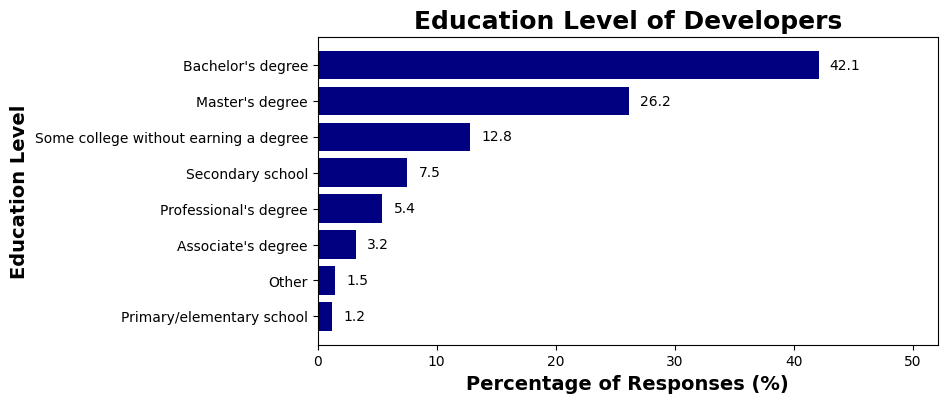

In [14]:
fig, ax = plt.subplots(figsize=(8, 4))
bars = plt.barh(y, x, color = 'navy')

ax.bar_label(bars, padding = 8, fmt='%.1f')

ax.set_xlabel('Percentage of Responses (%)', fontsize = 14, fontweight = 'bold')
ax.set_ylabel('Education Level', fontsize = 14, fontweight = 'bold')
ax.set_title("Education Level of Developers", fontsize = 18, fontweight = 'bold')

ax.set_xlim(right=res_sorted['Percentage of Responses'].max() + 10)

plt.show()

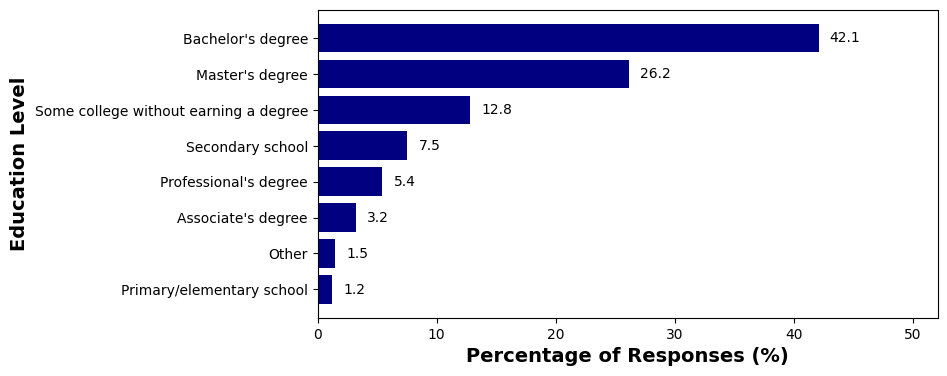

In [15]:
fig, ax = plt.subplots(figsize=(8, 4))
bars = plt.barh(y, x, color = 'navy')

ax.bar_label(bars, padding = 8, fmt='%.1f')

ax.set_xlabel('Percentage of Responses (%)', fontsize = 14, fontweight = 'bold')
ax.set_ylabel('Education Level', fontsize = 14, fontweight = 'bold')

ax.set_xlim(right=res_sorted['Percentage of Responses'].max() + 10)

plt.show()

In [16]:
queryAI = """
    select REPLACE(REPLACE(Age, ' years old', ''), '65 years or older', ' >=65') AS Age,
            Workexp as 'YrsOfExp', 
            aiselect, 
            aicomplex, 
            aiacc, 
            aisent
    from data
    where aiselect is not null
    and aicomplex is not null
    and aiacc is not null
    and aisent is not null
    and Age != 'Prefer not to say'
"""
resultAI = con.sql(queryAI).df()
resultAI

,Age,YrsOfExp,AISelect,AIComplex,AIAcc,AISent
0,25-34,8.0,"Yes, I use AI tools monthly or infrequently",Bad at handling complex tasks,Neither trust nor distrust,Indifferent
1,25-34,2.0,"Yes, I use AI tools weekly",Bad at handling complex tasks,Neither trust nor distrust,Indifferent
2,35-44,10.0,"Yes, I use AI tools daily",Neither good or bad at handling complex tasks,Somewhat trust,Favorable
3,35-44,4.0,"Yes, I use AI tools weekly",Bad at handling complex tasks,Somewhat trust,Favorable
4,35-44,21.0,"Yes, I use AI tools weekly","Good, but not great at handling complex tasks",Neither trust nor distrust,Favorable
...,...,...,...,...,...,...
32902,18-24,1.0,"Yes, I use AI tools monthly or infrequently",Neither good or bad at handling complex tasks,Somewhat trust,Favorable
32903,45-54,8.0,"Yes, I use AI tools daily",Very well at handling complex tasks,Highly trust,Very favorable
32904,25-34,2.0,"Yes, I use AI tools weekly","Good, but not great at handling complex tasks",Somewhat distrust,Favorable
32905,45-54,29.0,"Yes, I use AI tools daily",Neither good or bad at handling complex tasks,Somewhat distrust,Very favorable


In [17]:
resultAI.to_csv("ai_use.csv")

In [18]:
# Hypothesis 1: There is no relationship between the age range (Age) of devs 
# and the frequency of AI usage (AISelect).

In [19]:
contigency = pd.crosstab(resultAI['Age'], resultAI['AISelect'])
display(contigency)

AISelect,"No, and I don't plan to","No, but I plan to soon","Yes, I use AI tools daily","Yes, I use AI tools monthly or infrequently","Yes, I use AI tools weekly"
Age,,,,,
>=65,265,105,163,121,87
18-24,936,140,2535,739,1047
25-34,1532,414,5476,1371,1921
35-44,1365,478,4553,1278,1655
45-54,712,336,2106,679,826
55-64,478,248,703,320,318


In [20]:
from scipy.stats import chi2_contingency

In [21]:
chi2, p, dof, expected = chi2_contingency(contigency)

print("Chi-square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p)
print("Expected Frequencies:\n", expected)

Chi-square Statistic: 989.5264059939767
Degrees of Freedom: 20
P-value: 6.680990774153664e-197
Expected Frequencies:
 [[ 119.07521196   38.7534871   349.83973015  101.51116784  131.82040295]
 [ 867.27249521  282.25717932 2548.02297384  739.34652202  960.10082961]
 [1721.689367    560.33044641 5058.27647613 1467.73367369 1905.97003677]
 [1499.12638648  487.8964658  4404.39250008 1277.99957456 1659.58507308]
 [ 748.67936913  243.66058893 2199.59959887  638.24633057  828.8141125 ]
 [ 332.15717021  108.10183244  975.86872094  283.16273133  367.70954508]]


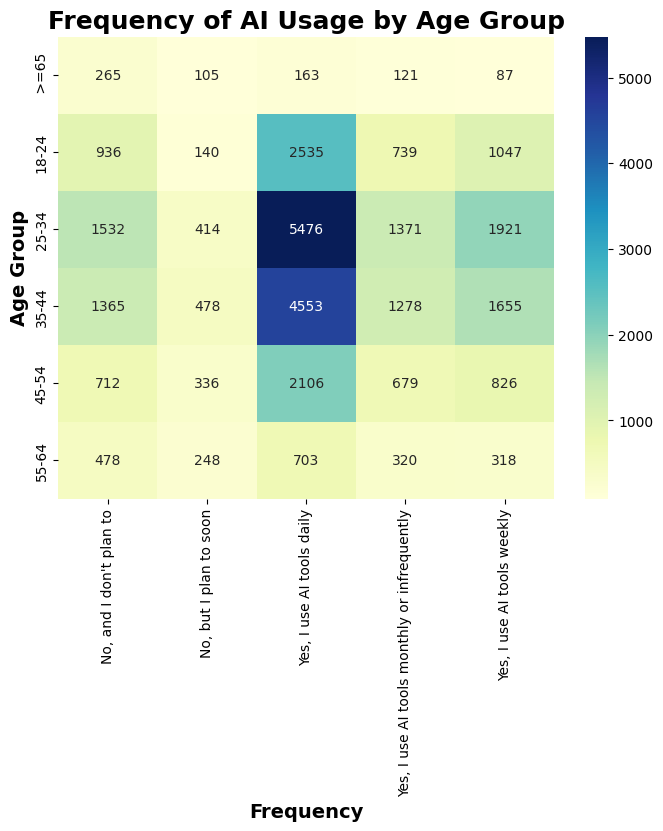

In [22]:
plt.figure(figsize=(8, 6))
sns.heatmap(contigency, annot=True, fmt="d", cmap="YlGnBu")

plt.title("Frequency of AI Usage by Age Group", fontsize = 18, fontweight = 'bold')
plt.xlabel("Frequency", fontsize = 14, fontweight = 'bold')
plt.ylabel("Age Group", fontsize = 14, fontweight = 'bold')
plt.show()

In [23]:
#Hypothesis 2: There is no association between 
# the frequency of AI usage (AISelect) and 
# the complexity of AI in handling complex tasks (AIComplex) that devs find.

In [24]:
contigency2 = pd.crosstab(resultAI['AISelect'], resultAI['AIComplex'])
display(contigency2)

AIComplex,Bad at handling complex tasks,"Good, but not great at handling complex tasks",I don't use AI tools for complex tasks / I don't know,Neither good or bad at handling complex tasks,Very poor at handling complex tasks,Very well at handling complex tasks
AISelect,,,,,,
"No, and I don't plan to",369,84,3368,166,1284,17
"No, but I plan to soon",243,232,781,245,181,39
"Yes, I use AI tools daily",3613,5933,377,2579,1869,1165
"Yes, I use AI tools monthly or infrequently",1256,614,603,654,1305,76
"Yes, I use AI tools weekly",1782,1447,365,1003,1145,112


In [25]:
chi2, p, dof, expected = chi2_contingency(contigency2)

print("Chi-square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p)
print("Expected Frequencies:\n", expected)

Chi-square Statistic: 15640.837469357934
Degrees of Freedom: 20
P-value: 0.0
Expected Frequencies:
 [[1167.12991157 1335.37788313  882.85993861  746.75102562  929.46157353
   226.41966755]
 [ 379.84693226  434.60388367  287.33017291  243.0330021   302.49685477
    73.68915428]
 [3428.99589753 3923.30385632 2593.81845808 2193.93417814 2730.73279241
   665.21481752]
 [ 994.97383535 1138.40459477  752.63475856  636.60242502  792.36247607
   193.02191023]
 [1292.05342328 1478.30978211  977.35667183  826.67936913 1028.94630322
   250.65445042]]


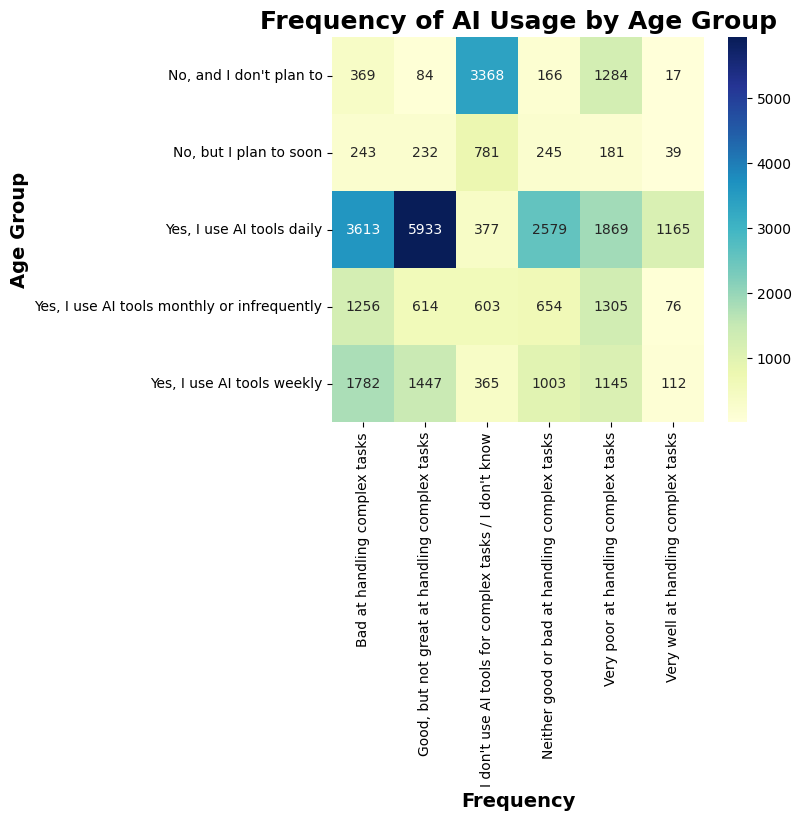

In [26]:
plt.figure(figsize=(6, 5))
sns.heatmap(contigency2, annot=True, fmt="d", cmap="YlGnBu")

plt.title("Frequency of AI Usage by Age Group", fontsize = 18, fontweight = 'bold')
plt.xlabel("Frequency", fontsize = 14, fontweight = 'bold')
plt.ylabel("Age Group", fontsize = 14, fontweight = 'bold')
plt.show()